In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# df.dropna(inplace=True)

In [5]:
df['pclass'].unique()

array([3, 1, 2])

In [6]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [7]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

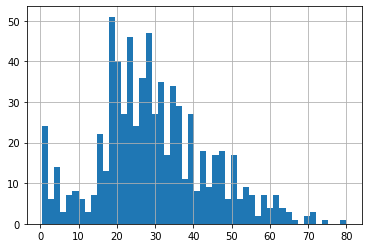

In [9]:
df['age'].hist(bins=50)

## Data Pre-Processing

In [10]:
subset = df[['pclass','sex','age','survived']].copy()
subset.dropna(inplace=True)

In [11]:
X = subset[['pclass','sex','age']].copy()

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [13]:
X['sex'] = le.fit_transform(subset['sex'])

In [14]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [15]:
X.shape

(714, 3)

In [16]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   sex     714 non-null    int64  
 2   age     714 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


In [18]:
y = subset['survived'].copy()

In [19]:
y.value_counts()

0    424
1    290
Name: survived, dtype: int64

## Fit Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [21]:
from sklearn.model_selection import train_test_split 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [41]:
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_train)
  if train:
    res = clf.predict(X_train)
    print("Train Result:\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, res)))
    print("Classification Report: \n {}\n".format(classification_report(y_train, res)))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, res)))
    print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), lb.transform(res))))
    res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
    print('Accuracy SD: \t\t {0:.4f}'.format(np.std(res)))
  elif train == False:
    res_test = clf.predict(X_test)
    print("Test Result:\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, res_test)))
    print("Classification Report: \n {}\n".format(classification_report(y_test, res_test)))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, res_test)))
    print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), lb.transform(res_test))))


# Decision Tree


In [42]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
clf.fit(X_train, y_train)

In [44]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n-----------------------------------------------")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9078

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       285
           1       0.96      0.82      0.88       214

    accuracy                           0.91       499
   macro avg       0.92      0.90      0.90       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix: 
 [[277   8]
 [ 38 176]]

ROC AUC: 0.8972

Average Accuracy: 	 0.8056
Accuracy SD: 		 0.0476

-----------------------------------------------
Test Result:

accuracy score: 0.8140

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       139
           1       0.76      0.70      0.73        76

    accuracy                           0.81       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.81      0.81      0.81       215


Confusion Matrix: 
 [[122  17]
 [ 23  53]]

ROC AUC: 0.78

# Bagging(oob_score=False)

In [45]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000, bootstrap=True, n_jobs=1, random_state=42)

In [46]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [48]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n-----------------------------------------------")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9078

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       285
           1       0.96      0.82      0.88       214

    accuracy                           0.91       499
   macro avg       0.92      0.90      0.90       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix: 
 [[277   8]
 [ 38 176]]

ROC AUC: 0.8972

Average Accuracy: 	 0.8056
Accuracy SD: 		 0.0476

-----------------------------------------------
Test Result:

accuracy score: 0.8140

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       139
           1       0.76      0.70      0.73        76

    accuracy                           0.81       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.81      0.81      0.81       215


Confusion Matrix: 
 [[122  17]
 [ 23  53]]

ROC AUC: 0.78

In [49]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000, bootstrap=True, n_jobs=1, random_state=42, oob_score=True)

In [50]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [51]:
bag_clf.oob_score_

0.7915831663326653

In [52]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n-----------------------------------------------")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9078

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       285
           1       0.96      0.82      0.88       214

    accuracy                           0.91       499
   macro avg       0.92      0.90      0.90       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix: 
 [[277   8]
 [ 38 176]]

ROC AUC: 0.8972

Average Accuracy: 	 0.8056
Accuracy SD: 		 0.0476

-----------------------------------------------
Test Result:

accuracy score: 0.8140

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       139
           1       0.76      0.70      0.73        76

    accuracy                           0.81       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.81      0.81      0.81       215


Confusion Matrix: 
 [[122  17]
 [ 23  53]]

ROC AUC: 0.78

In [53]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print("\n-----------------------------------------------")
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9078

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       285
           1       0.94      0.84      0.89       214

    accuracy                           0.91       499
   macro avg       0.91      0.90      0.90       499
weighted avg       0.91      0.91      0.91       499


Confusion Matrix: 
 [[274  11]
 [ 35 179]]

ROC AUC: 0.8989

Average Accuracy: 	 0.8075
Accuracy SD: 		 0.0520

-----------------------------------------------
Test Result:

accuracy score: 0.8047

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       139
           1       0.73      0.71      0.72        76

    accuracy                           0.80       215
   macro avg       0.79      0.78      0.79       215
weighted avg       0.80      0.80      0.80       215


Confusion Matrix: 
 [[119  20]
 [ 22  54]]

ROC AUC: 0.78